# Determine K in Kmeans clustering

This notebook uses the t-SNE PCA reduced data from the notebook: Chemical_space_analysis_and_visualization.ipynb

It demonstrates 2 methods to find the optimal number of clusters for K-Means clustering:
 - elbow method

 - silhouette score.

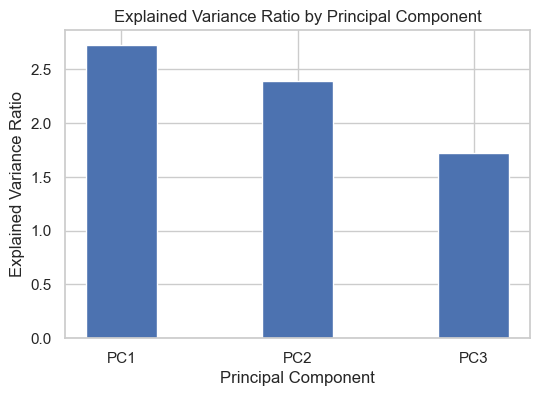

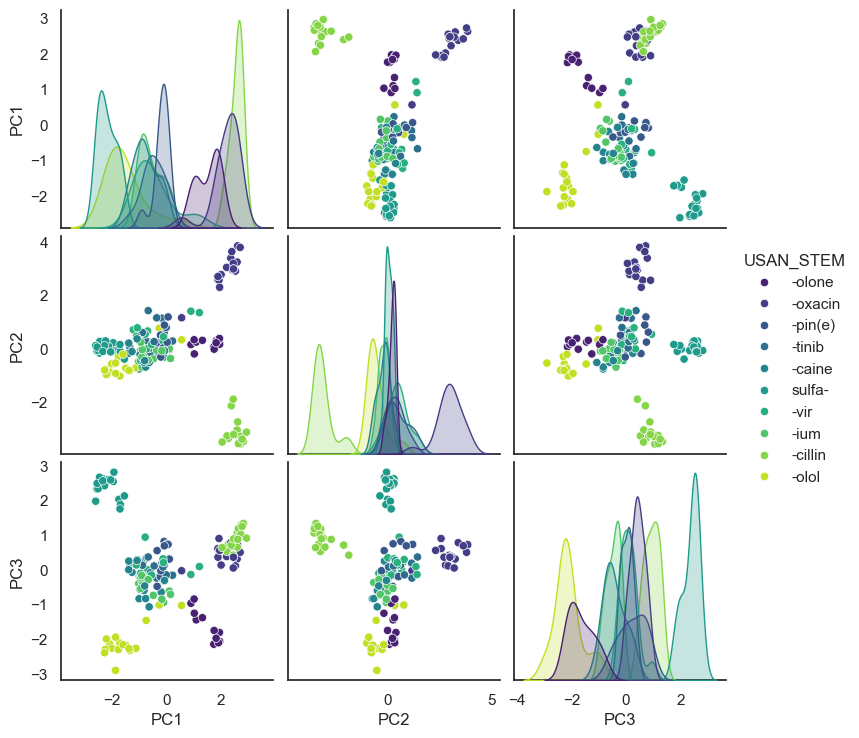

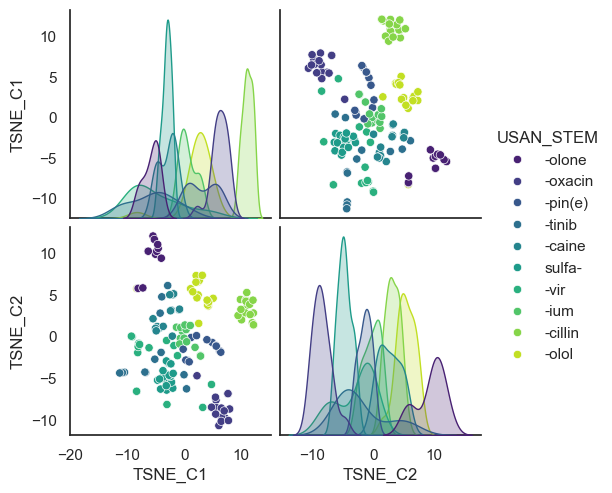

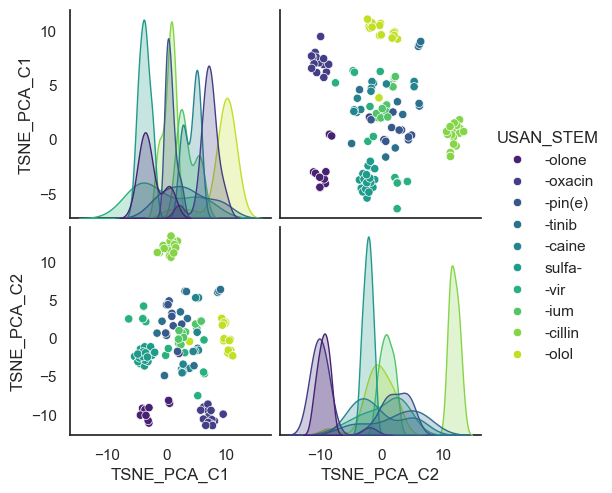

In [1]:
# Pass the notebook to the Jupyter kernel to run it. 
%run Dimensionality_reduction_method.ipynb

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
from Kmeans_Clustering import calculate_WSS, sil # Import some metric calculation functions from Kmeans_Clustering.py
from sklearn.metrics import calinski_harabasz_score

## Elbow Method

### WCSS (Within-Cluster Sum of Squares) Metric
By default, elbow method calculates the inertia (within-cluster sum of squares,aka WCSS) for a range of cluster numbers and plots it. The optimal number of clusters is where the inertia starts to decrease at a slower rate, forming an "elbow" in the plot due to that adding more clusters beyond this point does not significantly improve the model's performance.

### Calinski-Harabasz Index
Alternatively, the Calinski-Harabasz index is a metric that evaluates the quality of clustering by measuring the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Dispersion is calculated as the squared distance between each point and its assigned cluster center. A higher Calinski-Harabasz index indicates better-defined clusters.

In [5]:
# Use elbow method to find the optimal number K of clusters
def elbow_method(kmax1):

    # tsne_pca_drugs is the previously reduced data using t-SNE and PCA and prepared for k-clustering
    plt.plot(range(1, kmax1+1), calculate_WSS(tsne_pca_drugs, kmax1),'o-') 
    ax1 = plt.gca() 
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # set x-axis major ticks to 1
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(1000)) # set y-axis major ticks to 1000 
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method for Optimal K')
    plt.show()

   
    # Calculate Calinski-Harabasz score for each k
    ch_scores = []
    for n_clusters in range(2, kmax1+1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42,).fit(tsne_pca_drugs)
        # kmeans.fit(X)
        labels = kmeans.labels_
        score = calinski_harabasz_score(tsne_pca_drugs, labels)
        ch_scores.append(score)
    plt.xlabel('Number of clusters')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Score for Optimal K')
    plt.plot(range(2, kmax1+1), ch_scores, marker='o')

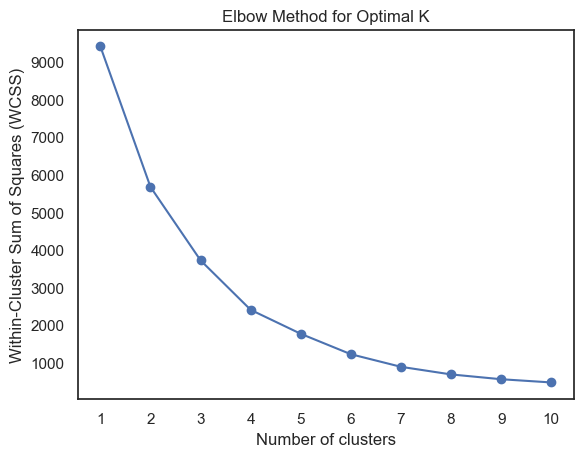

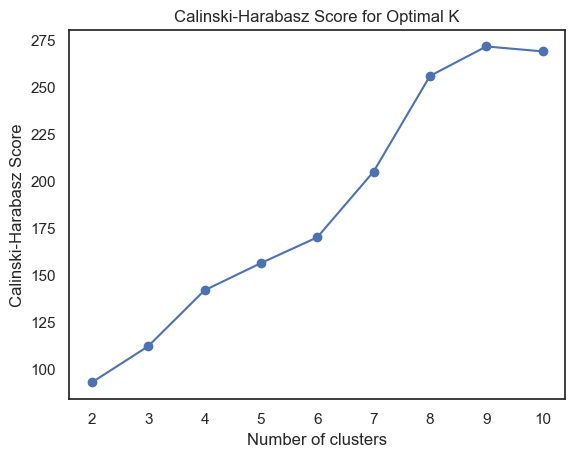

In [6]:
elbow_method(int(input("Enter the maximum number of clusters: ")))

## Silhouette Score Method
Silhouette Score Method is following the Elbow Method, also a technique used to determine the optimal number of clusters in a dataset. It provides a way to assess how well-separated the clusters are and how similar the points within each cluster are. The reason for using the silhouette score is that it gives a more nuanced view of cluster quality compared to the elbow method.

The silhouette plot displays a measure, ranging [-1, 1] where

- +1: This means clusters are clearly distinguished

- 0: This means clusters are neutral in nature and can not be distinguished properly

- -1: This means the clusters are assigned in the wrong way

The formula for a single silhouette coefficient is,

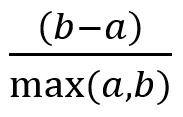

Where, a is the average distance between a sample and all other points in the same cluster, and b is the average distance between a sample and all points in the nearest cluster.

In [7]:
# Use silhouette score to find the optimal number K of clusters
def sil_score(kmax2):
    plt.plot(range(2, kmax2+1), sil(tsne_pca_drugs, kmax2),'o-')
    ax1 = plt.gca()
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # set x-axis major ticks to 1
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.25)) # set y-axis major ticks to 0.25
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal K')
    plt.show()

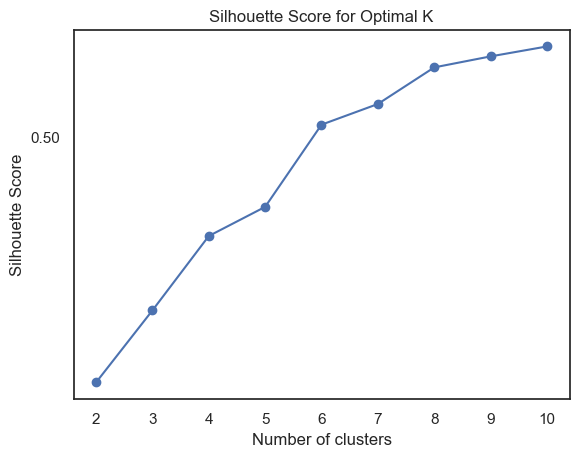

In [8]:
sil_score(int(input("Enter the maximum number of clusters: ")))

In [9]:
def plot_clustered(k, data, df_mini):
    kmeans = KMeans(n_clusters=k, random_state=30, max_iter=1000, n_init=20, tol=1e-6).fit(data)
    
    # Ensure df_mini is not a slice but an independent DataFrame
    df_mini = df_mini.copy()

    # Assign cluster labels to dataframe
    df_mini["clustered_x"] = data[:, 0]
    df_mini["clustered_y"] = data[:, 1]
    df_mini["cluster"] = kmeans.labels_

    # Get cluster centers as a separate DataFrame
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=["clustered_x", "clustered_y"])
    
    # Create a new figure
    plt.figure(figsize=(16, 8))

    # Plot clustered points by USAN_STEM
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df_mini, hue="USAN_STEM", x="clustered_x", y="clustered_y")
    plt.xlabel("t-SNE PCA 1")
    plt.ylabel("t-SNE PCA 2")
    plt.title(f"K-Means Clustering by USAN_STEM (k={k})")
    plt.legend()

    # Plot clustered points by cluster
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df_mini, x="clustered_x", y="clustered_y", hue="cluster", palette="tab10")
    plt.xlabel("t-SNE PCA 1")
    plt.ylabel("t-SNE PCA 2")
    plt.title(f"K-Means Clustering by Cluster (k={k})")
    plt.legend()

    
    plt.show()

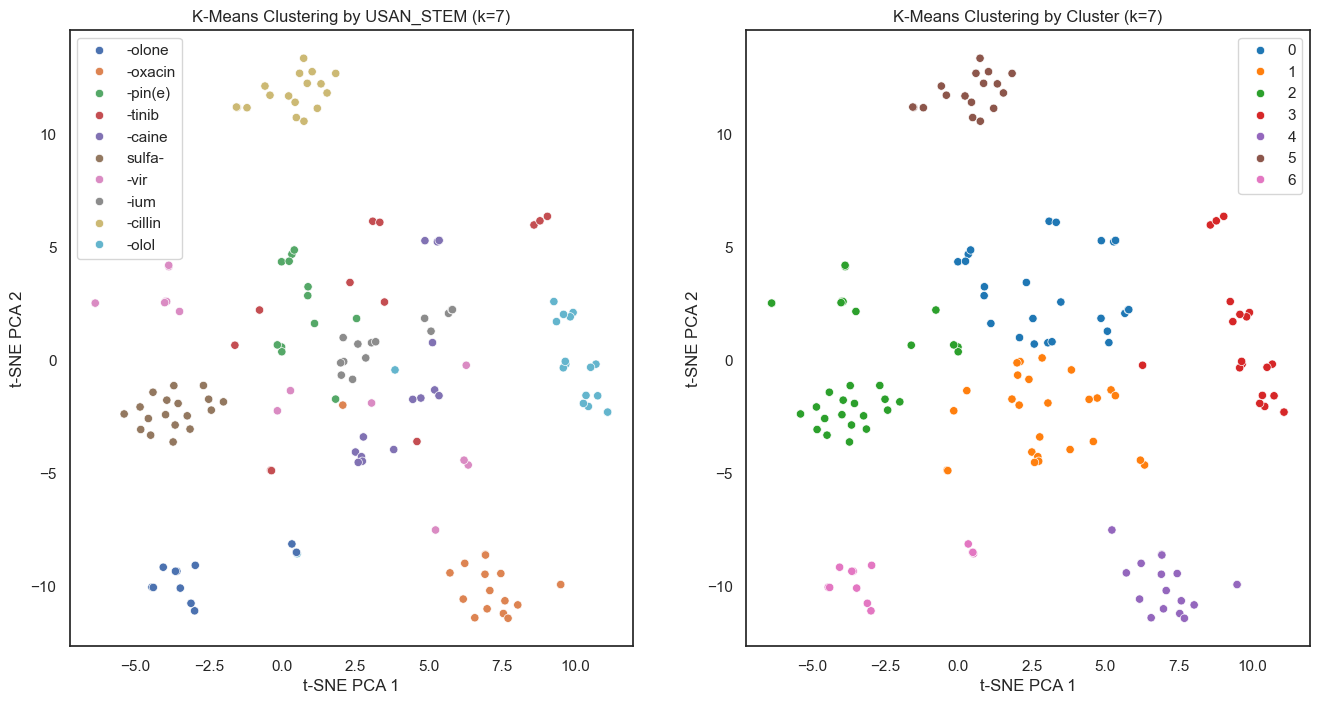

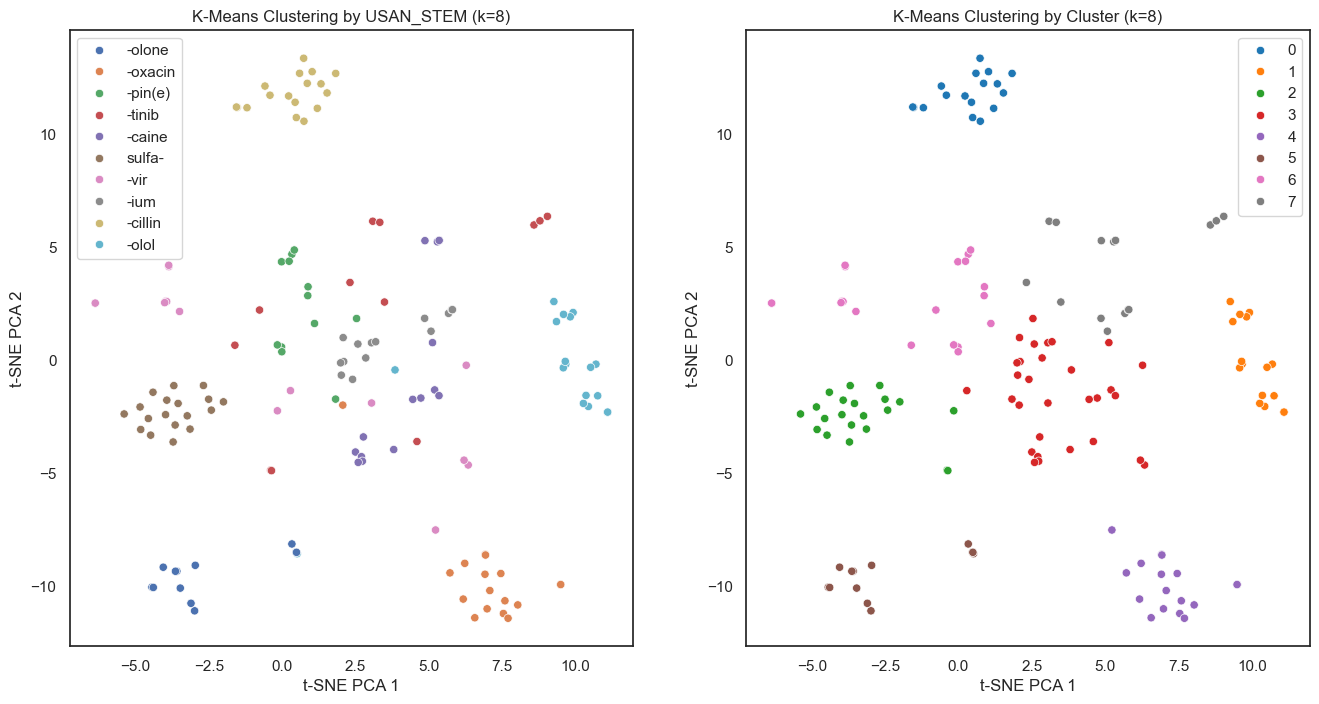

In [10]:
df_mini = df_small[['USAN_STEM']]
# df_small is the dataframe of compounds that belong to 10 most common USAN stems, which is dimensionality reduced using t-SNE with/without PCA. 
# df_mini is a smaller version of df_small with only the USAN_STEM column.

for i in range (7,9): 
    plot_clustered(i, tsne_pca_drugs, df_mini)
    # i is the number of clusters, which can be adjusted based on the results from the elbow method and silhouette score.
    # tsne_pca_drugs is the previously reduced data using t-SNE and PCA and prepared for k-clustering; tsne_drugs is without PCA